## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## Alumno: Diego Miguel Trujillo Sierra
## **Proyecto del Módulo 6: Procesamiento de Lenguaje Natural**

# Objetivos
- Aplicar el análisis de sentimientos a datos de la vida real.
- Realizar la recolección y análisis de sentimientos con las herramientas de Python.
- Generar diferentes gráficas que ayuden a entender los sentimientos generales del _dataset_.

## Proyecto
Usarás el _dataset_ -> https://www.kaggle.com/datasets/kazanova/sentiment140, que tiene más de 1.6 millones de tuits extraídos con la API de Twitter, para realizar lo siguiente:


1. Hacer todo el preprocesamiento de datos, que incluye:
  - Quitar valores nulos
  - Remover los URL de los tuits
  - Remover números
  - Quitar signos de puntuación
  - Eliminar las palabras de parada

2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tuit.

3. Realizar la vectorización de los textos y justificar la elección del vectorizador y optimizador.

4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.
  - Puedes seleccionar el vectorizador y los optimizadores de tu preferencia.

5. Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y **escribir** las conclusiones de tus resultados.

  - Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

**NOTA:** Puedes reducir el tamaño del _dataset_ según tu criterio, con el fin de reducir el tiempo de ejecución o evitar que el COLAB se detenga debido al consumo de RAM.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones |
| -- | -- | -- |
| Actividad 1. Limpieza | 20 | Realiza las siguientes actividades en el _dataset_: quitar valores nulos. Remover las URL de los tuits. Remover números. Quitar signos de puntuación. Eliminar las palabras de parada.|
| Actividad 2. Análisis inicial | 20 | Debes generar una gráfica con leyendas y títulos adecuados para ser leídos por una persona que no sea del área. Además, debes realizar una nube de palabras por cada sentimiento _target_ que tiene el _dataset_.
| Actividad 3. Vectorización | 20 | Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos. |
| Actividad 4. Entrenamiento 1 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |
| Actividad 5. Entrenamiento 2 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |


# 1: Carga y limpieza de datos

---

En el proyecto desarrollado, el preprocesamiento de datos se llevó a cabo con meticulosidad para preparar los datos para un análisis de sentimientos efectivo. Los pasos ejecutados incluyeron:

*  Remover los URL de los tuits: Dado que los enlaces a páginas web no contribuyen al sentimiento expresado, se eliminaron para enfocar el análisis en el contenido textual relevante.
*  Remover números: Se quitaron los números ya que, en este caso, no aportan información significativa sobre el sentimiento del texto. Además muchas veces los números son parte del nombre del usuario o perfil que emitió la opinión.
*  Quitar signos de puntuación: Se eliminaron los signos de puntuación para simplificar el texto y homogeneizar el conjunto de datos.
*  Eliminar las palabras de parada (o palabras vacías): Se removieron las palabras comunes que no aportan valor significativo al análisis de
sentimientos. Estas palabras son, por ejemplo, artículos (el, la, este, esta), verbos vacíos (es, ha), etc.
*   Stemmer: Se utilizó el Stemmer de Porter con la finalidad de reducir las palabras a su base, de forma que palabras como "grande" o "grandes" se consideren como una sola palabra y no como dos distintas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# El dataset no contiene nombre de las columnas, por lo que es necesario agregarlas.
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Lee el archivo, codificado en ISO-8859-1 y no tiene encabezado (header=None)
df = pd.read_csv("/content/drive/MyDrive/UCamp/M6/training.1600000.processed.noemoticon.csv",
                 encoding='ISO-8859-1', names=column_names, header=None)

print(df.head())


   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
# Reducir el df a las columnas deseadas:
df = df[['target', 'text']]


In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stemmer=PorterStemmer()
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content

In [ ]:
df['texto_timpio'] = df['text'].apply(stemming)

In [ ]:
# Crear CSV para descargar ram
ruta_completa = '/content/drive/MyDrive/UCamp/M6/tweets_cleaned.csv'

# Exportar el DataFrame a CSV
df.to_csv(ruta_completa, index=False)

print(f'Archivo guardado en: {ruta_completa}')


Archivo guardado en: /content/drive/MyDrive/UCamp/M6/tweets_cleaned.csv


In [ ]:
df.head()

,target,text,texto_timpio
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


## 2. Análisis inicial

---

Para el análisis inicial, se generaron visualizaciones como gráficas y nubes de palabras para cada sentimiento (positivo y negativo), ofreciendo una representación visual de las palabras más frecuentes y destacadas en el conjunto de datos según el sentimiento. Para el sentimiento "**neutro**" no se encontraron entradas, pero decidí no eliminarlo, por si en el futuro se necesita incluir la variable en el modelo. Las variables **positivo** y **negativo** están equilibradas, como se muestra en el gráfico de barras, por lo que no hay que hacer ajustes.

En cuanto a las nubes de palabras, la primera muestra las palabras más frecuentes para el conjunto de datos. Tiene una preponderancia de palabras positivas como "love", "today", y "fun", sugiriendo una actitud general optimista o contenidos positivos. La palabra "love" es central y de gran tamaño, indicando su frecuencia y relevancia. Palabras como "work", "haha", y "thank".

La segunda nube, etiquetada como "Target: Negativo (0)", contiene una mezcla de palabras positivas y negativas, aunque con una inclinación hacia sentimientos negativos, como se ve en palabras como "suck", "hate", "sad", y "bad". A pesar de la presencia de "love" y "hope", que podrían usarse de forma irónica, el tamaño y la centralidad de términos negativos pueden indicar una tendencia hacia expresiones de insatisfacción o desagrado en el dataframe.

La tercera nube está marcada como "Target: Positivo (4)" y destaca palabras como "love", "thank", "fun", y "awesome", que están asociadas con emociones y valoraciones positivas. Al igual que en la primera nube, "love" ocupa un lugar destacado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/UCamp/M6/tweets_cleaned.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   target        1600000 non-null  int64 
 1   text          1600000 non-null  object
 2   texto_timpio  1599505 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.6+ MB


In [ ]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599505 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   target        1599505 non-null  int64 
 1   text          1599505 non-null  object
 2   texto_timpio  1599505 non-null  object
dtypes: int64(1), object(2)
memory usage: 48.8+ MB


In [ ]:
palabras_a_eliminar = ["quot", "amp", "twitpic", "lol"]
df_clean['texto_timpio'] = df_clean['texto_timpio'].str.replace('|'.join(palabras_a_eliminar), ' ', regex=True)

<ipython-input-16-a46aae7f1b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['texto_timpio'] = df_clean['texto_timpio'].str.replace('|'.join(palabras_a_eliminar), ' ', regex=True)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

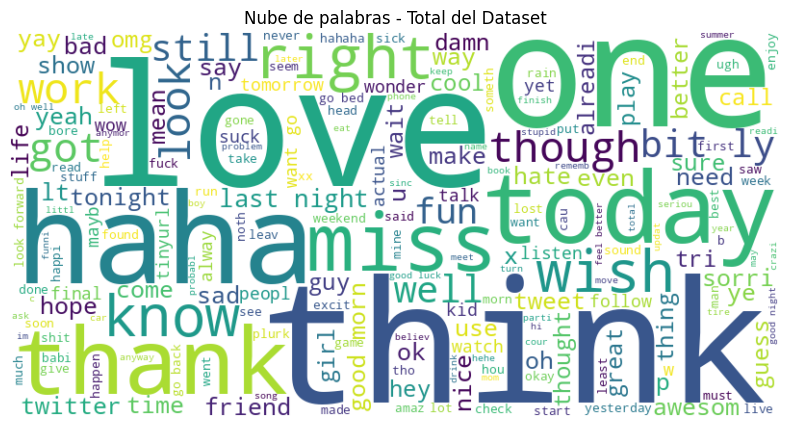

In [ ]:
texto = df_clean['texto_timpio'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Total del Dataset")
plt.show()


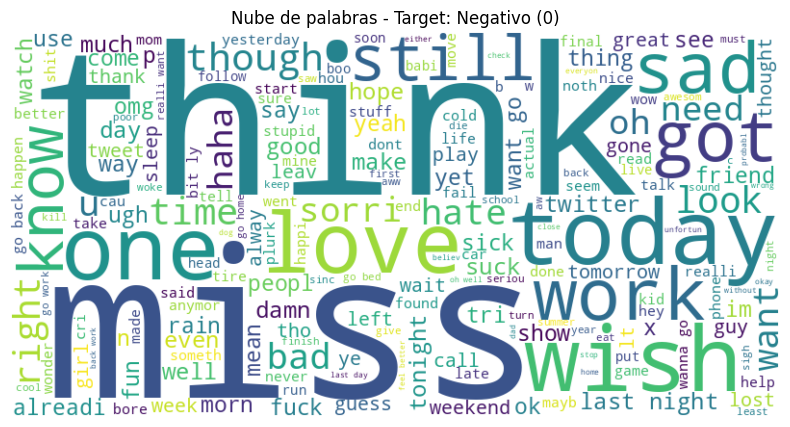

In [ ]:
df_negativo = df_clean[df_clean['target'] == 0]
texto_negativo = df_negativo['texto_timpio'].str.cat(sep=' ')
wordcloud_negativo = WordCloud(width=800, height=400, background_color='white').generate(texto_negativo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negativo, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Target: Negativo (0)")
plt.show()

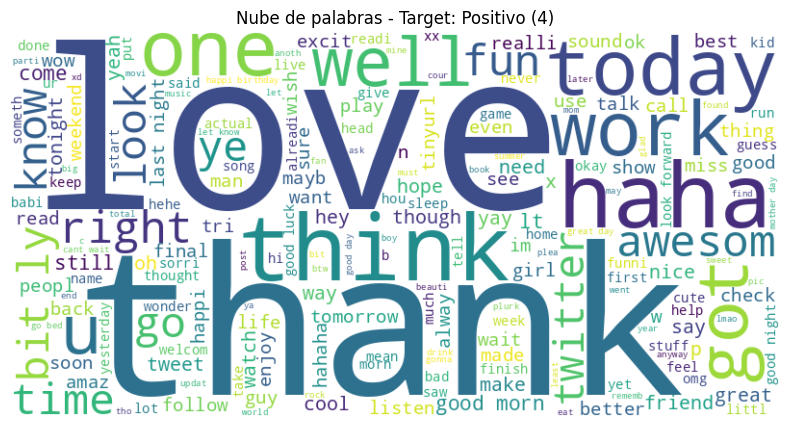

In [ ]:
df_positivo = df_clean[df_clean['target'] == 4]
texto_positivo = df_positivo['texto_timpio'].str.cat(sep=' ')
wordcloud_positivo = WordCloud(width=800, height=400, background_color='white').generate(texto_positivo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivo, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Target: Positivo (4)")
plt.show()

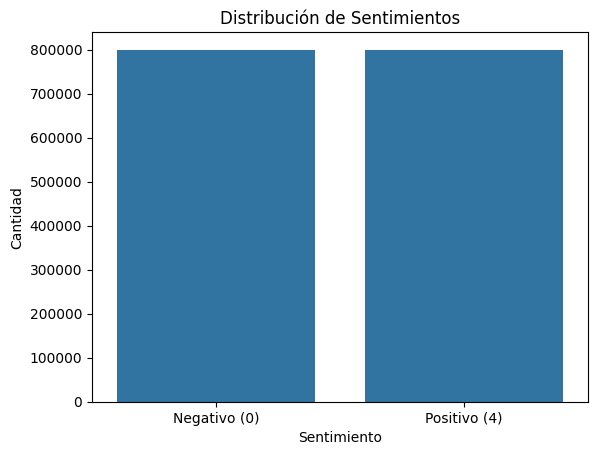

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_counts = df_clean['target'].value_counts().sort_index()

labels = {0: 'Negativo (0)', 2: 'Neutro (2)', 4: 'Positivo (4)'}
xticks_labels = [labels[x] for x in target_counts.index]

sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(range(len(target_counts)), xticks_labels)
plt.show()

## 3. Vectorización

---

Para la vectorización de los textos, se eligió utilizar TF-IDF (Term Frequency-Inverse Document Frequency), ya que este método pondera las palabras en función de su importancia, destacando las que son significativas en el contexto del análisis de sentimientos. Este enfoque permite que el modelo distinga mejor entre diferentes sentimientos basándose en la relevancia de las palabras en los tweets, en referencia con las palabras que están a su alrededor.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline

tfidf = TfidfVectorizer()

## 4. Entrenamiento 1: Modelo Multinomial de Naive Bayes

---

El primer modelo de clasificación entrenado fue un Modelo Multinomial de Naive Bayes. Este modelo es popular en la clasificación de texto debido a su simplicidad y efectividad, especialmente en tareas de análisis de sentimientos. La precisión alcanzada por este modelo fue del 75.44%, lo que indica una capacidad razonable para clasificar correctamente los sentimientos de los tuits. La matriz de confusión muestra una clara tendencia a predecir de forma correcta verdaderos positivos y negativos.

Nota: La matriz de confusión se realizó solo con sentimientos positivos y negativos, debido a que no hay neutros en el df.

Además, se realizó una prueba con textos específicos, demostrando la capacidad del modelo para identificar correctamente sentimientos negativos y positivos en los ejemplos proporcionados.

El modelo logró predecir con eficacia los siguientes tweets:
* Positivo: "You are a great actor. I really loved the movie and the story"
* Negativo: "I hate this song and the singer is really bad."

In [ ]:
# Separar conjuntos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(df_clean['texto_timpio'], df_clean['target'], test_size=0.2, random_state=42)

In [ ]:
# Pipeline que vectoriza el texto con TF-IDF y luego aplica el modelo Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
# Evaluación del modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76    159373
           4       0.77      0.73      0.75    160528

    accuracy                           0.75    319901
   macro avg       0.76      0.75      0.75    319901
weighted avg       0.76      0.75      0.75    319901

Accuracy: 0.7544927962088271


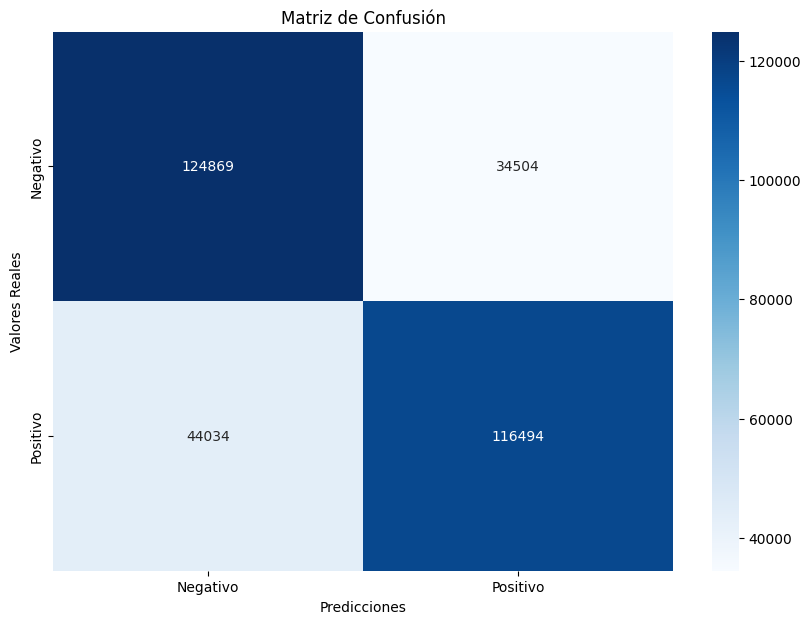

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


In [ ]:
tweet = "I hate this song and the singer is really bad."
stemming(tweet)

predicted_sentiment = model.predict([tweet])
sentiment_label = 'Negativo' if predicted_sentiment[0] == 0 else ('Neutro' if predicted_sentiment[0] == 2 else 'Positivo')
print(f"El sentimiento predicho para el tweet es: {sentiment_label}")


El sentimiento predicho para el tweet es: Negativo


In [ ]:
tweet2 = "You are a great actor. I really loved the movie and the story"
stemming(tweet2)

predicted_sentiment2 = model.predict([tweet2])
sentiment_label2 = 'Negativo' if predicted_sentiment2[0] == 0 else ('Neutro' if predicted_sentiment2[0] == 2 else 'Positivo')
print(f"El sentimiento predicho para el tweet es: {sentiment_label2}")


El sentimiento predicho para el tweet es: Positivo


## 5. Entrenamiento 2: Regresión logística

---

Como segundo algoritmo de clasificación, se optó por la Regresión Logística, conocida por su eficacia en problemas de clasificación binaria y múltiple. La precisión de este modelo fue del 77.78%, superior a la del modelo Naive Bayes, lo que sugiere una mejor capacidad para distinguir entre sentimientos positivos y negativos en el conjunto de datos. Este resultado subraya la eficacia de la Regresión Logística en el contexto del análisis de sentimientos en textos.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Vectorizar el texto de los tweets con tfidf
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [ ]:
# Entrenar el modelo de regresión logística
modelo_lg = LogisticRegression(max_iter=1000)
modelo_lg.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predecir el sentimiento de los datos de prueba
y_pred_lg = modelo_lg.predict(X_test_vec)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_lg))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_lg))

Accuracy: 0.7777656212390709

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77    159373
           4       0.77      0.80      0.78    160528

    accuracy                           0.78    319901
   macro avg       0.78      0.78      0.78    319901
weighted avg       0.78      0.78      0.78    319901



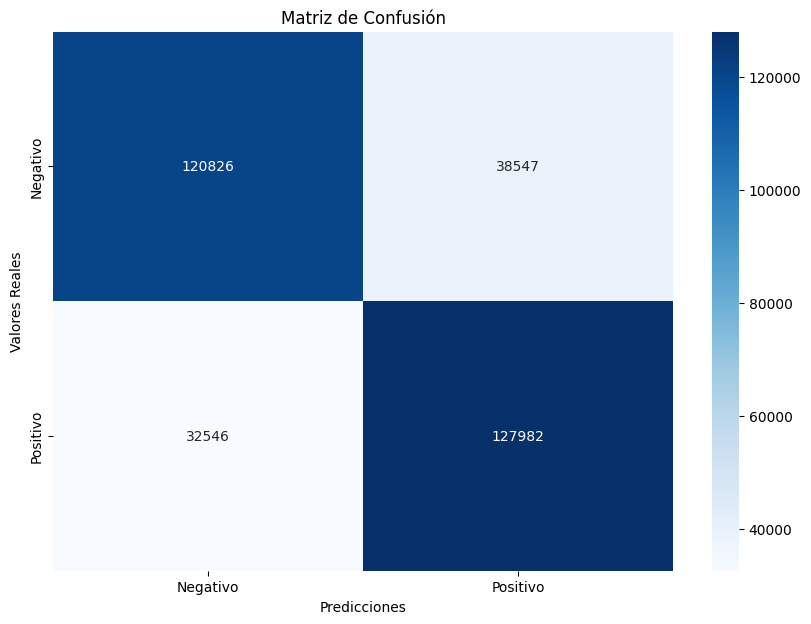

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm_lg = confusion_matrix(y_test, y_pred_lg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lg, annot=True, fmt="d", cmap="Blues", xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [ ]:
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Limpieza del tweet (al no ser una lista, la función no funcionó para este modelo)
stemmer = PorterStemmer()
stop_words = stopwords.words('english')
tweet = "I hate this song and the singer is really bad."
processed_tweet = re.sub('[^a-zA-Z]',' ',tweet).lower().split()
processed_tweet = [stemmer.stem(word) for word in processed_tweet if word not in stop_words]
processed_tweet = ' '.join(processed_tweet)

new_tweet_vectorized = tfidf.transform([processed_tweet])
new_tweet_reshaped = new_tweet_vectorized.reshape(1, -1)

prediction = modelo_lg.predict(new_tweet_reshaped)

if prediction == 0:
    print("Sentimiento predecido: Negativo")
elif prediction == 2:
    print("Sentimiento predecido: Neutro")
elif prediction == 4:
    print("Sentimiento predecido: Positivo")
else:
    print("Sentimiento predecido:", prediction)


Sentimiento predecido: Negativo


In [ ]:
stemmer = PorterStemmer()
stop_words = stopwords.words('english')
tweet = "You are a great actor. I really loved the movie and the story"
processed_tweet = re.sub('[^a-zA-Z]',' ',tweet).lower().split()
processed_tweet = [stemmer.stem(word) for word in processed_tweet if word not in stop_words]
processed_tweet = ' '.join(processed_tweet)

new_tweet_vectorized = tfidf.transform([processed_tweet])
new_tweet_reshaped = new_tweet_vectorized.reshape(1, -1)

prediction = modelo_lg.predict(new_tweet_reshaped)

if prediction == 0:
    print("Sentimiento predecido: Negativo")
elif prediction == 2:
    print("Sentimiento predecido: Neutro")
elif prediction == 4:
    print("Sentimiento predecido: Positivo")
else:
    print("Sentimiento predecido:", prediction)

Sentimiento predecido: Positivo


# Conclusión

El proceso de preprocesamiento de datos y la elección de técnicas de vectorización (Tf-idf) y algoritmos de clasificación demostraron ser fundamentales para el análisis de sentimientos. La comparación entre Naive Bayes y Regresión Logística reveló diferencias en la precisión, con la Regresión Logística mostrando un mejor rendimiento general. Esto destaca la importancia de seleccionar y ajustar cuidadosamente los métodos de procesamiento de lenguaje natural y los modelos de aprendizaje automático para tareas específicas de análisis de sentimientos.


En mi opinión como científico de datos, tanto los modelos de bagging como de boosting podrían ofrecer mejoras significativas en comparación con los modelos de clasificación individuales como Naive Bayes y Regresión Logística, dependiendo de la naturaleza del problema y la calidad del conjunto de datos. Sin embargo, tanto bagging como boosting aumentan la complejidad del modelo, lo que puede llevar a un mayor tiempo de entrenamiento y necesitar una mayor cantidad de GPUs y RAM.
